In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [198]:
df=pd.read_csv("D:\Kartik DataScience\Python\Assignment 7\crime_data.csv")

In [199]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [200]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


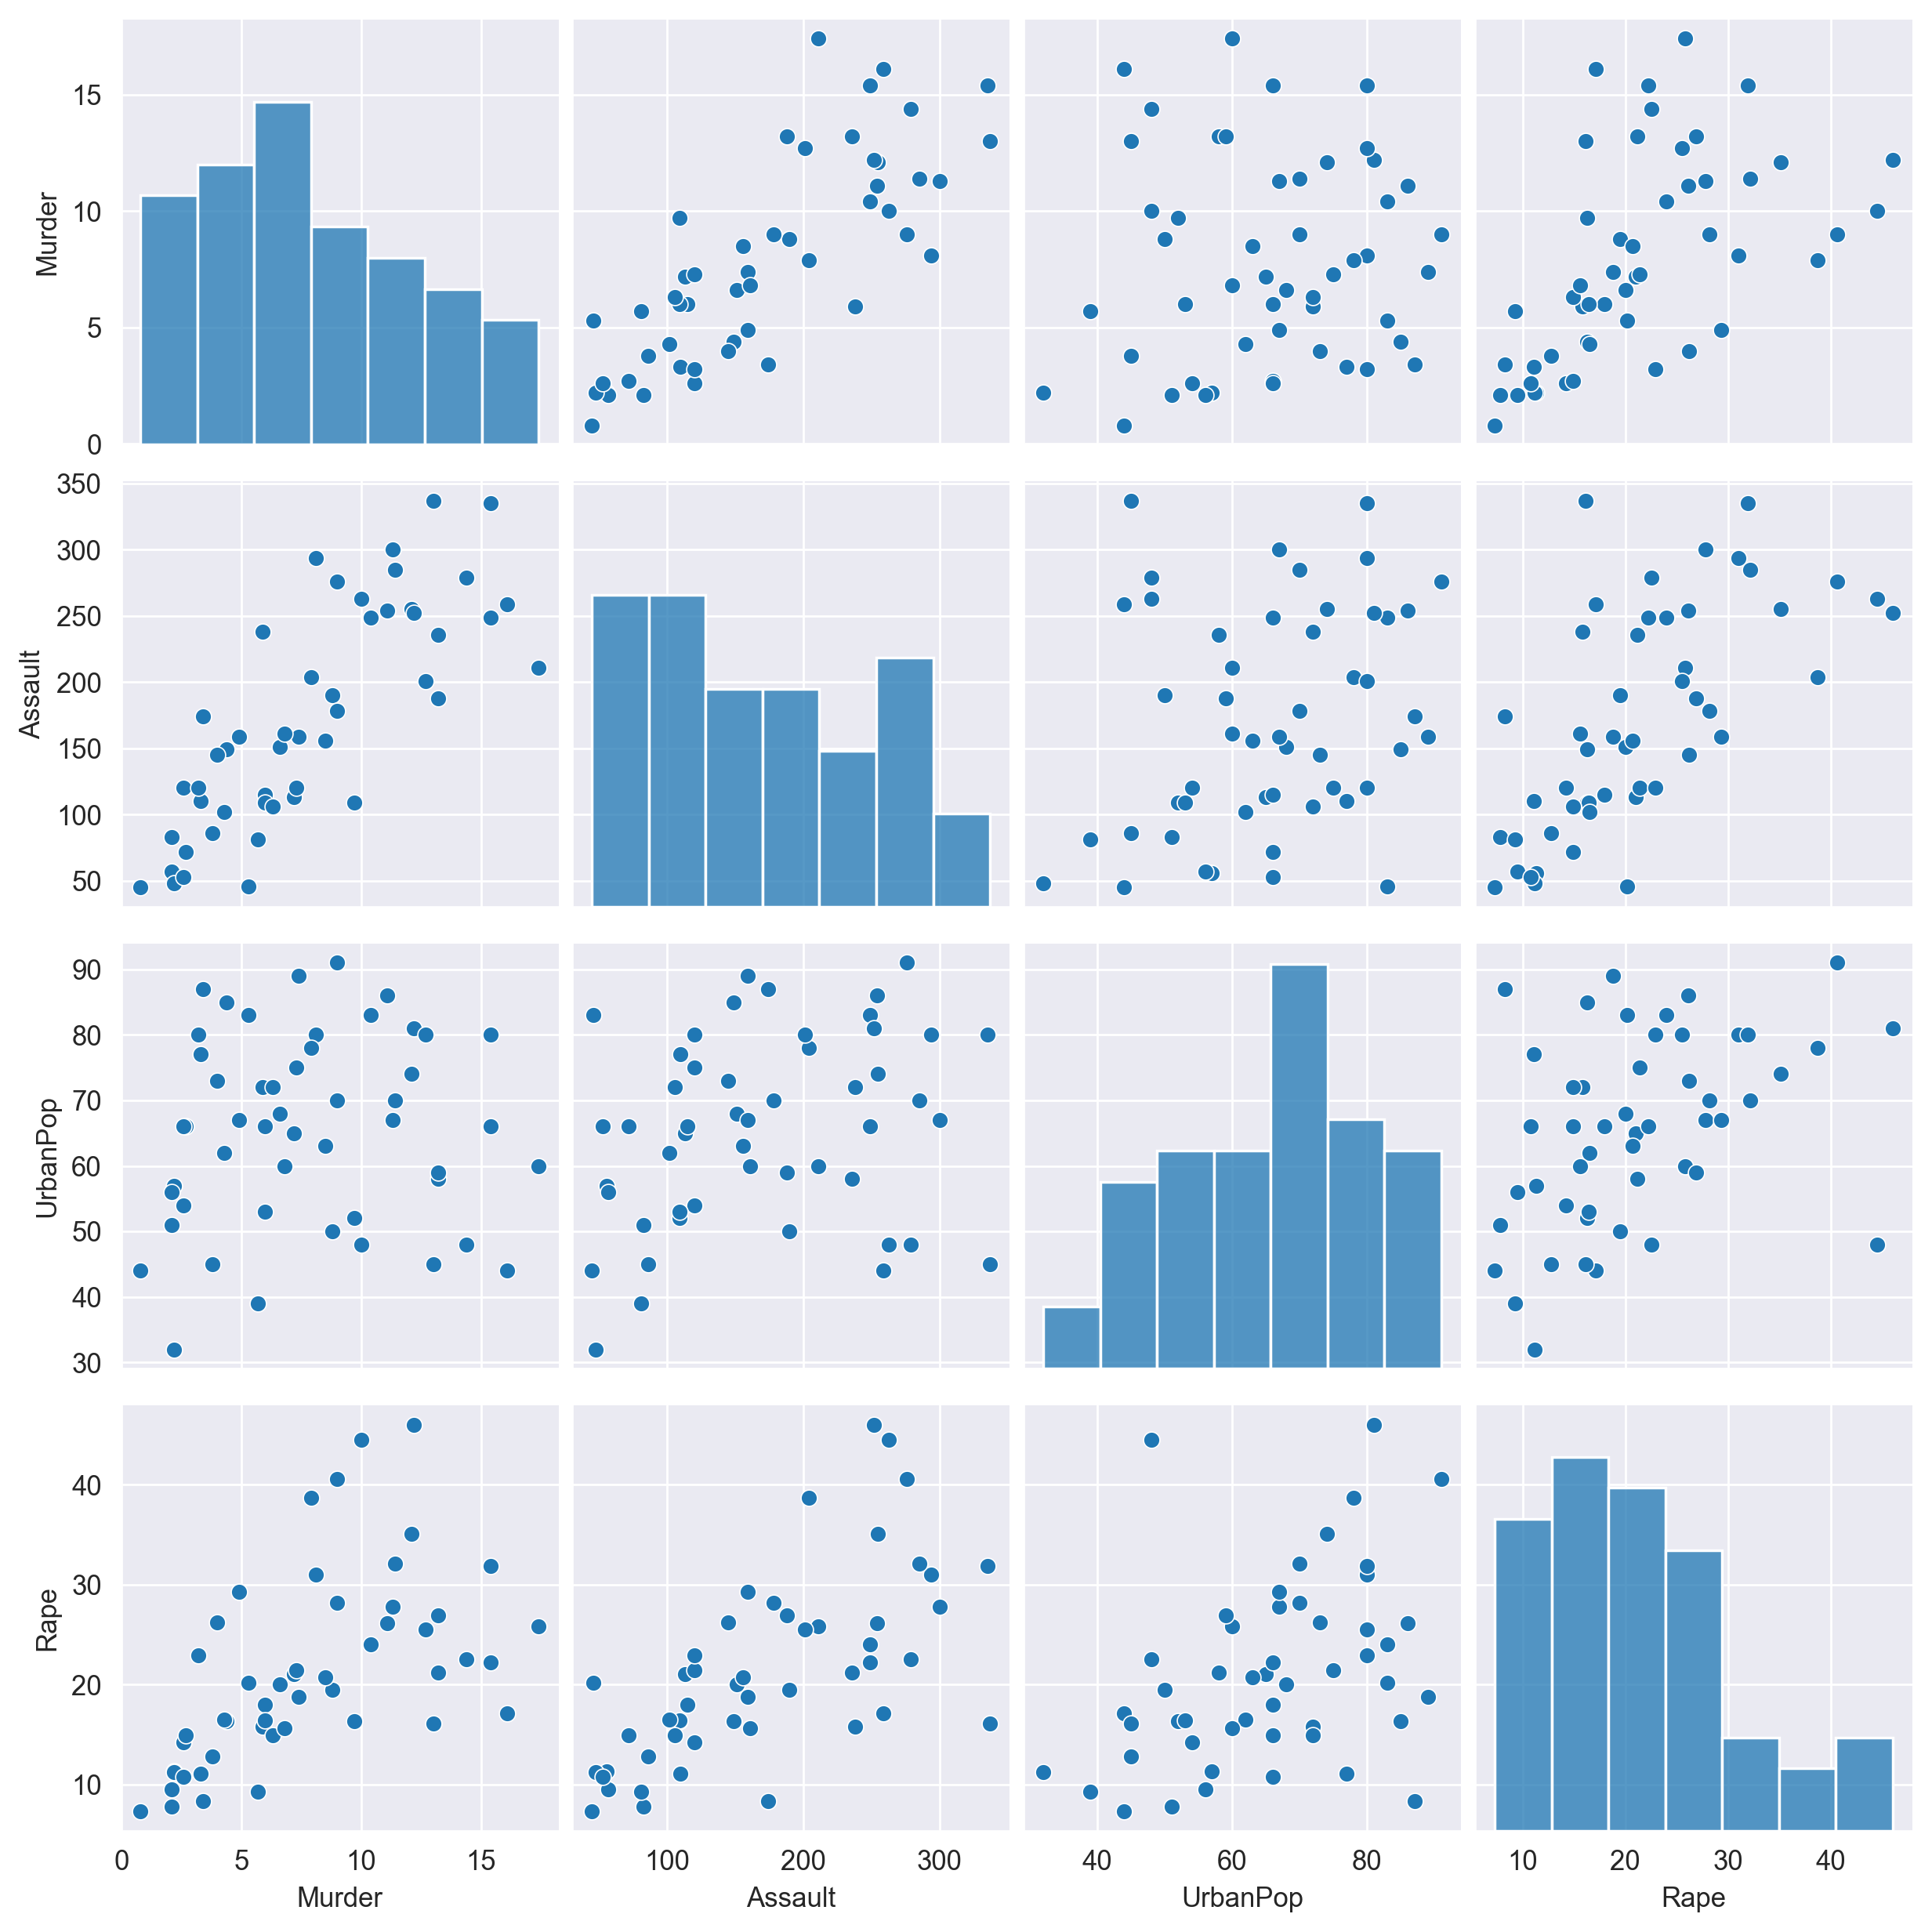

In [201]:
sns.pairplot(df)

In [202]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [203]:
df1=df.drop('Unnamed: 0',axis=1)

In [204]:
# from sklearn import preprocessing
# le=preprocessing.LabelEncoder()
# df['Unnamed: 0']=le.fit_transform(df['Unnamed: 0'])
# df

In [205]:
df1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [206]:
df1.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<Axes: >

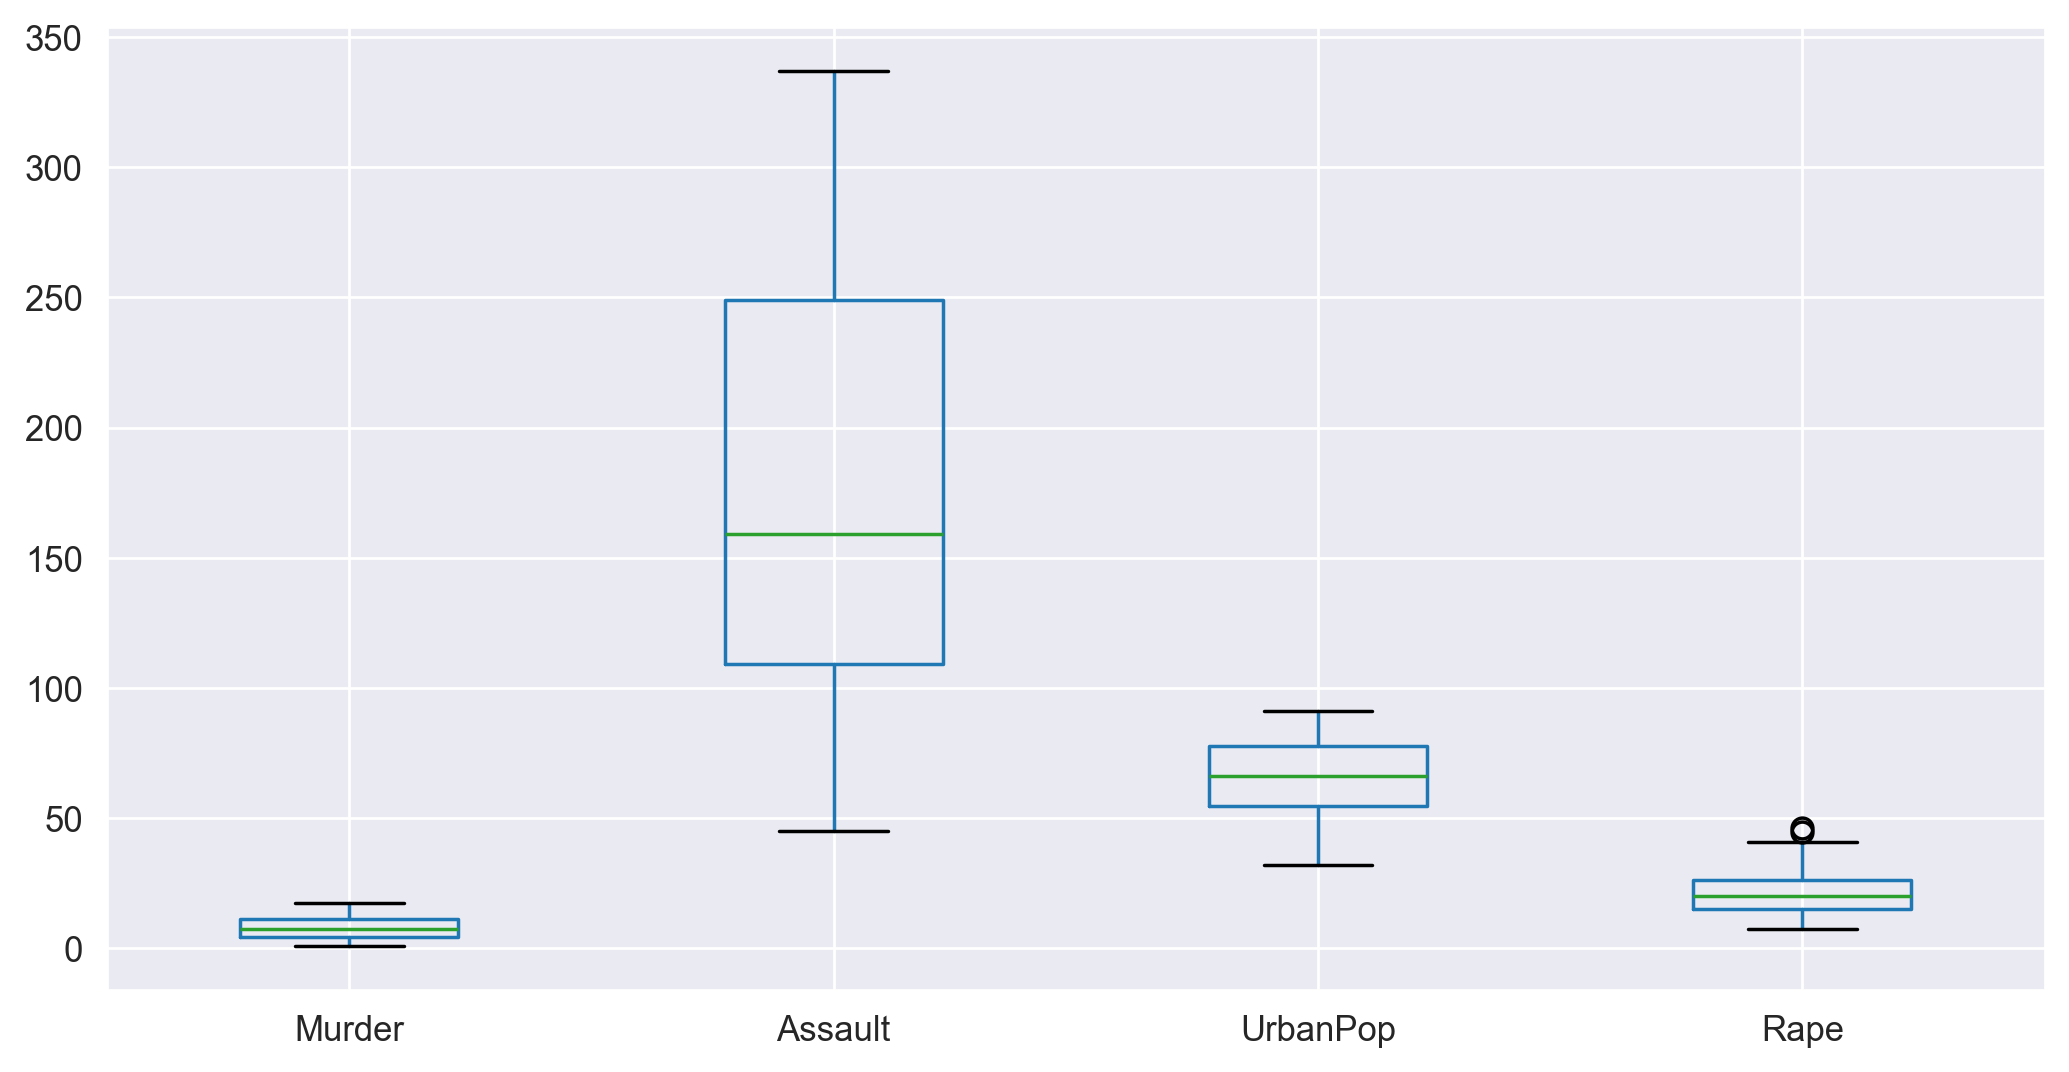

In [207]:
df1.boxplot()

In [208]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(df1) 

In [209]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

DbScan Clustering

In [210]:
from sklearn.cluster import DBSCAN

In [211]:
db = DBSCAN(eps=0.5, min_samples=2,metric='euclidean')
dbscan_labels=db.fit_predict(X)
dbscan_labels


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  2,  1, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1],
      dtype=int64)

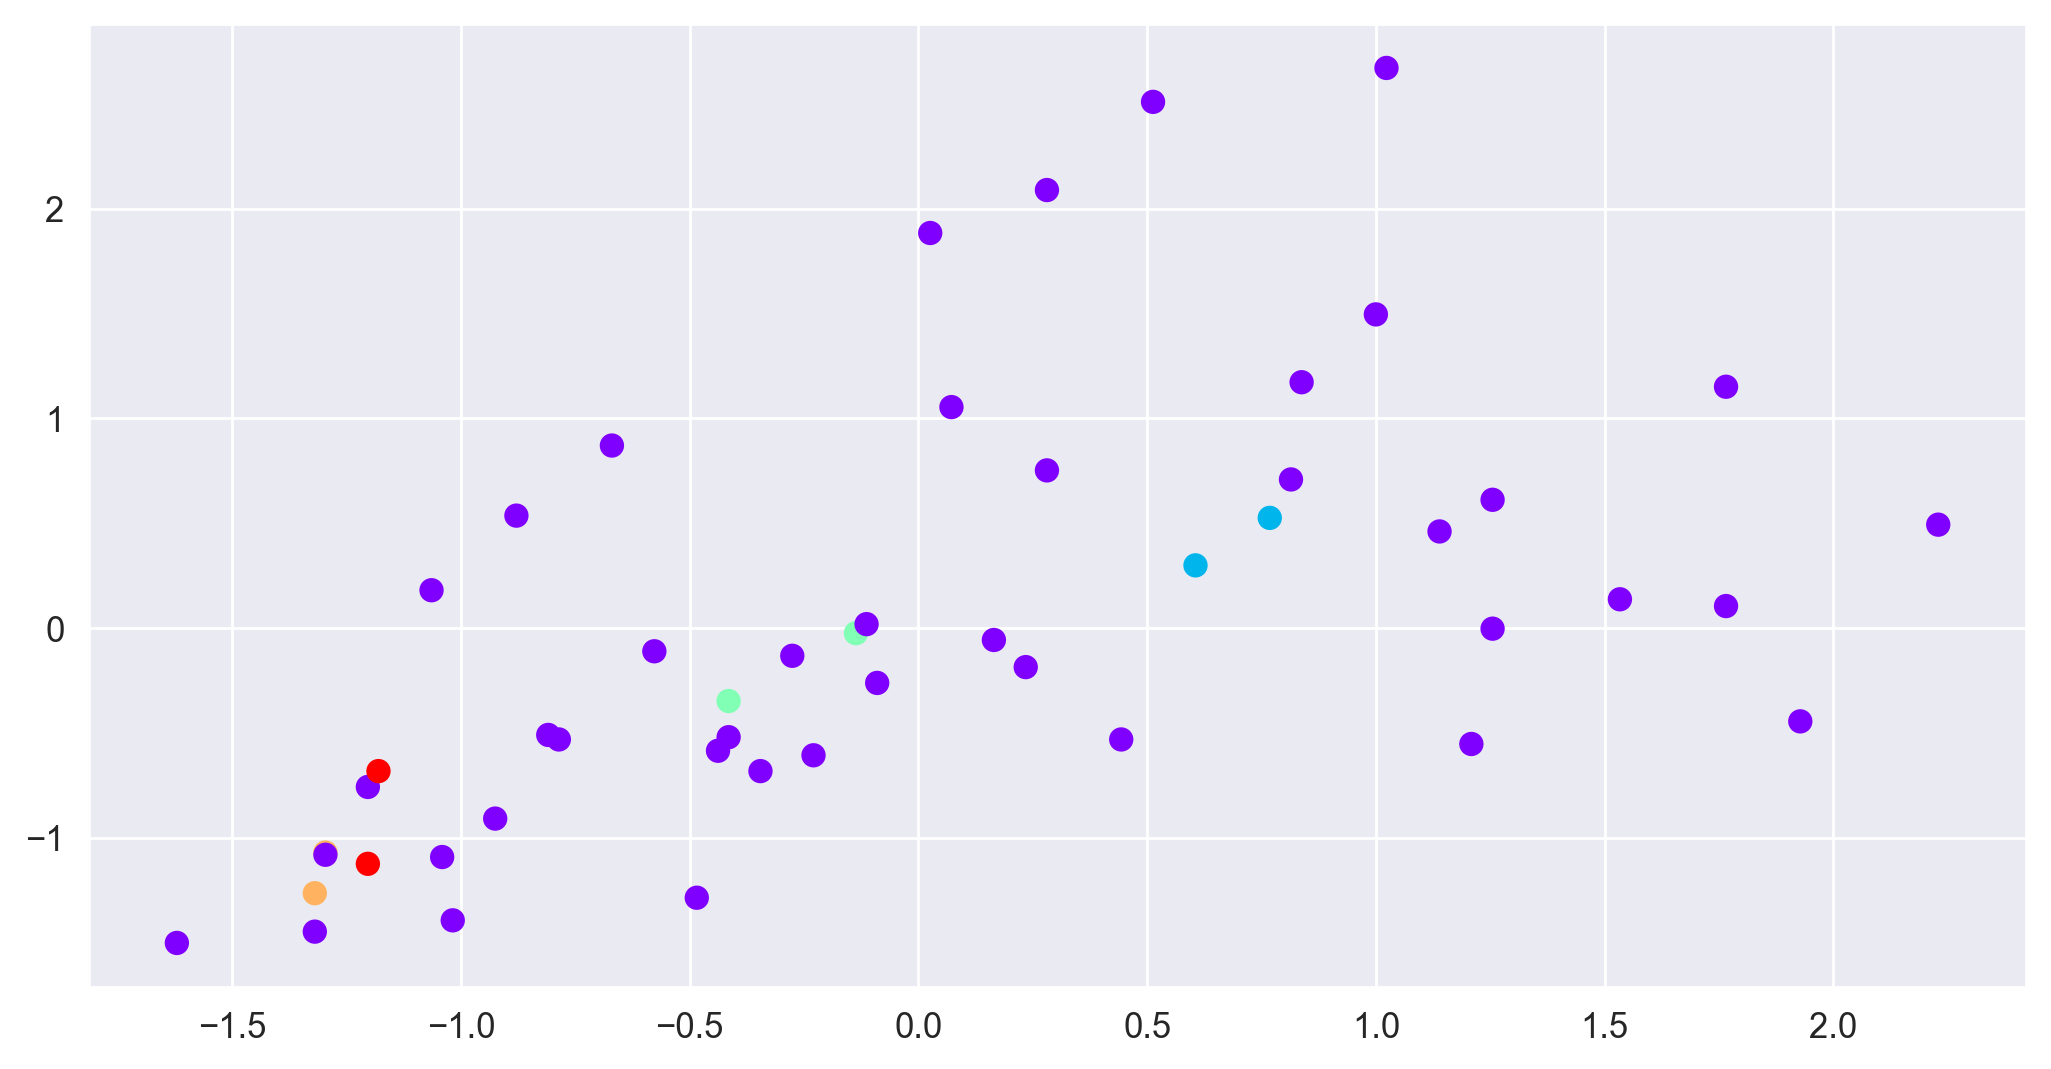

In [212]:
plt.scatter(X[:,0],X[:,-1],c=y,cmap='rainbow')

In [213]:
from sklearn.metrics import silhouette_score

In [214]:
silhouette_score(X,dbscan_labels)

-0.2689925316677858

Hierarchical Clustering

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [216]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [217]:
import numpy as np
normalize_df=normalize(X)
normalize_df=pd.DataFrame(normalize_df)
pca=PCA(n_components=2)
X_principal=pca.fit_transform(normalize_df)

X_principal

array([[ 0.7723797 ,  0.69274052],
       [ 0.73631441,  0.30760439],
       [ 0.88209507, -0.42435701],
       [ 0.05305703,  1.00861638],
       [ 0.84466025, -0.56154878],
       [ 0.72744811, -0.50660482],
       [-0.70779108, -0.47115813],
       [ 0.10935898, -0.27016692],
       [ 1.05334013, -0.05320027],
       [ 0.81022778,  0.52215022],
       [-0.46512427, -0.66773635],
       [-0.84512071,  0.23861154],
       [ 0.85185493, -0.45126534],
       [-0.67055292, -0.07838756],
       [-0.92432637,  0.09234409],
       [-0.87961289, -0.16907436],
       [-0.40258825,  0.79766691],
       [ 0.89442062,  0.39911975],
       [-0.88126799,  0.28333233],
       [ 1.02338538,  0.15054643],
       [-0.29903506, -0.81006302],
       [ 1.03523043, -0.13675606],
       [-0.89351323, -0.21349876],
       [ 0.53352603,  0.88219677],
       [ 0.82877562, -0.34193709],
       [-0.77662209,  0.53112361],
       [-0.91936138, -0.01308638],
       [ 0.92888997, -0.29528061],
       [-0.92240266,

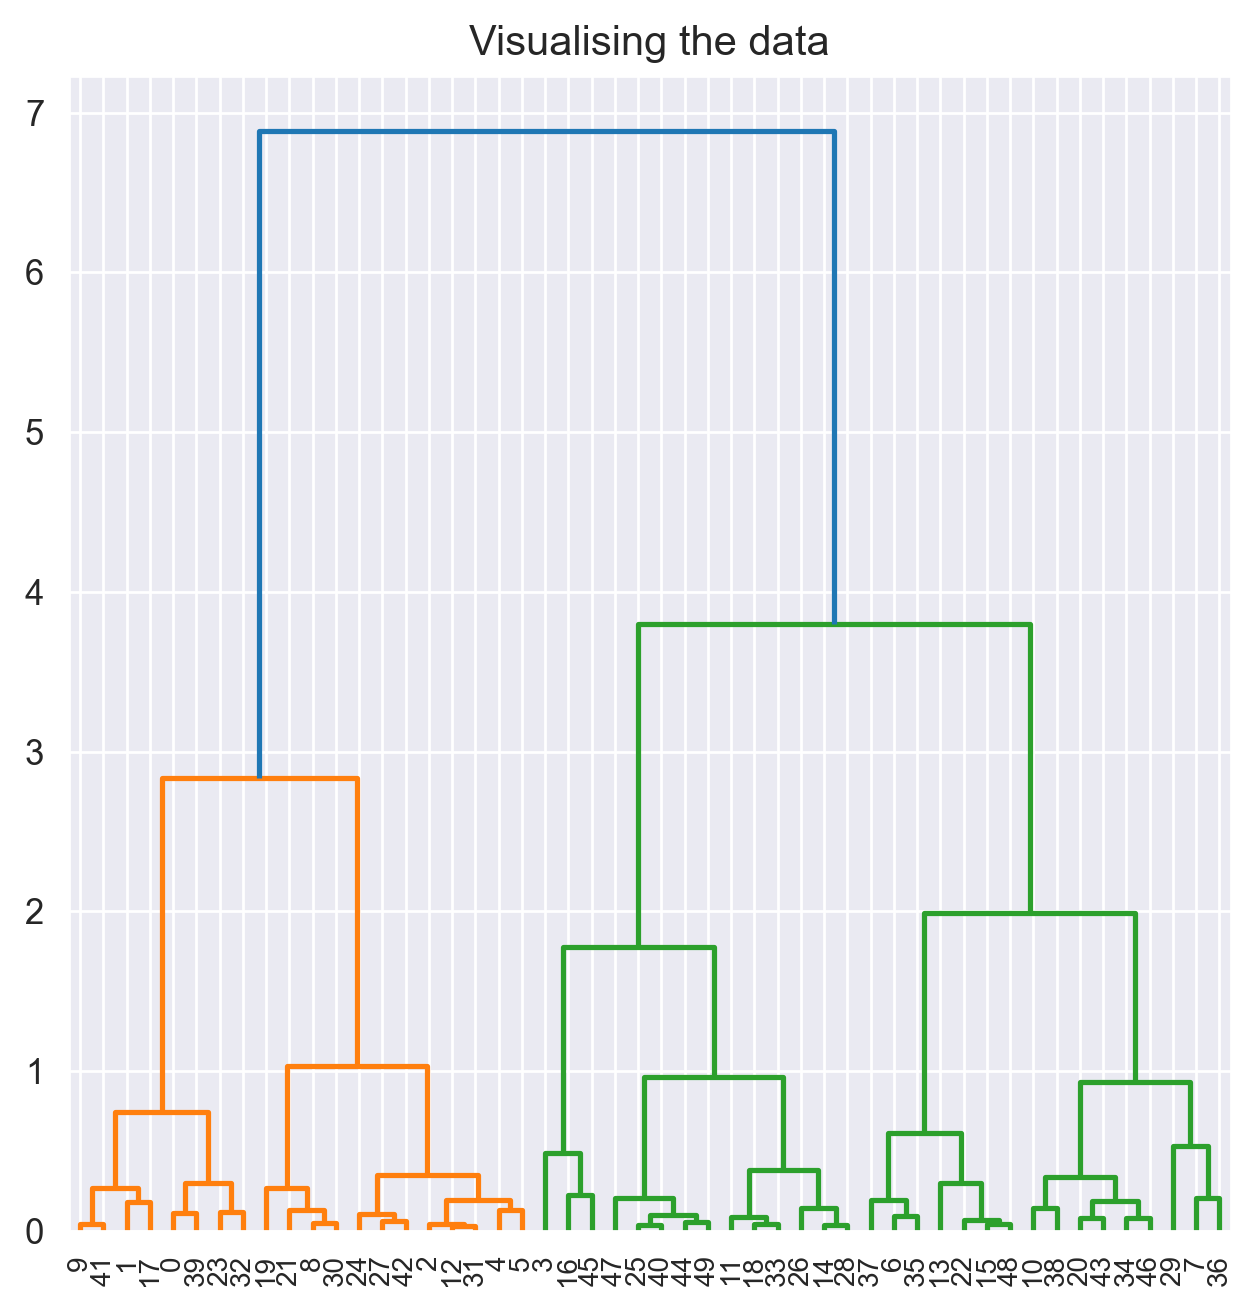

In [218]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

In [219]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

In [220]:
hierarchical_labels=agg.fit_predict(X_principal)
hierarchical_labels

array([0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 2, 1, 2, 1, 2], dtype=int64)

In [221]:
silhouette_score(X_principal,hierarchical_labels)

0.5038996269578306

K-Means Clustering

In [222]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [223]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [224]:
from sklearn.cluster import KMeans

In [225]:
kmeans=KMeans(n_clusters=5,random_state=41)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=41)

In [226]:
kmeans_label=kmeans.predict(X)

In [227]:
kmeans_label

array([3, 2, 2, 4, 2, 2, 0, 0, 2, 3, 0, 1, 2, 4, 1, 4, 4, 3, 1, 2, 0, 2,
       1, 3, 4, 1, 1, 2, 1, 0, 2, 2, 3, 1, 4, 4, 4, 0, 0, 3, 1, 3, 2, 0,
       1, 4, 4, 1, 1, 4])

In [228]:
silhouette_score(X,kmeans_label)

0.3062295123951626

In [229]:
from scipy.cluster.hierarchy import dendrogram,linkage

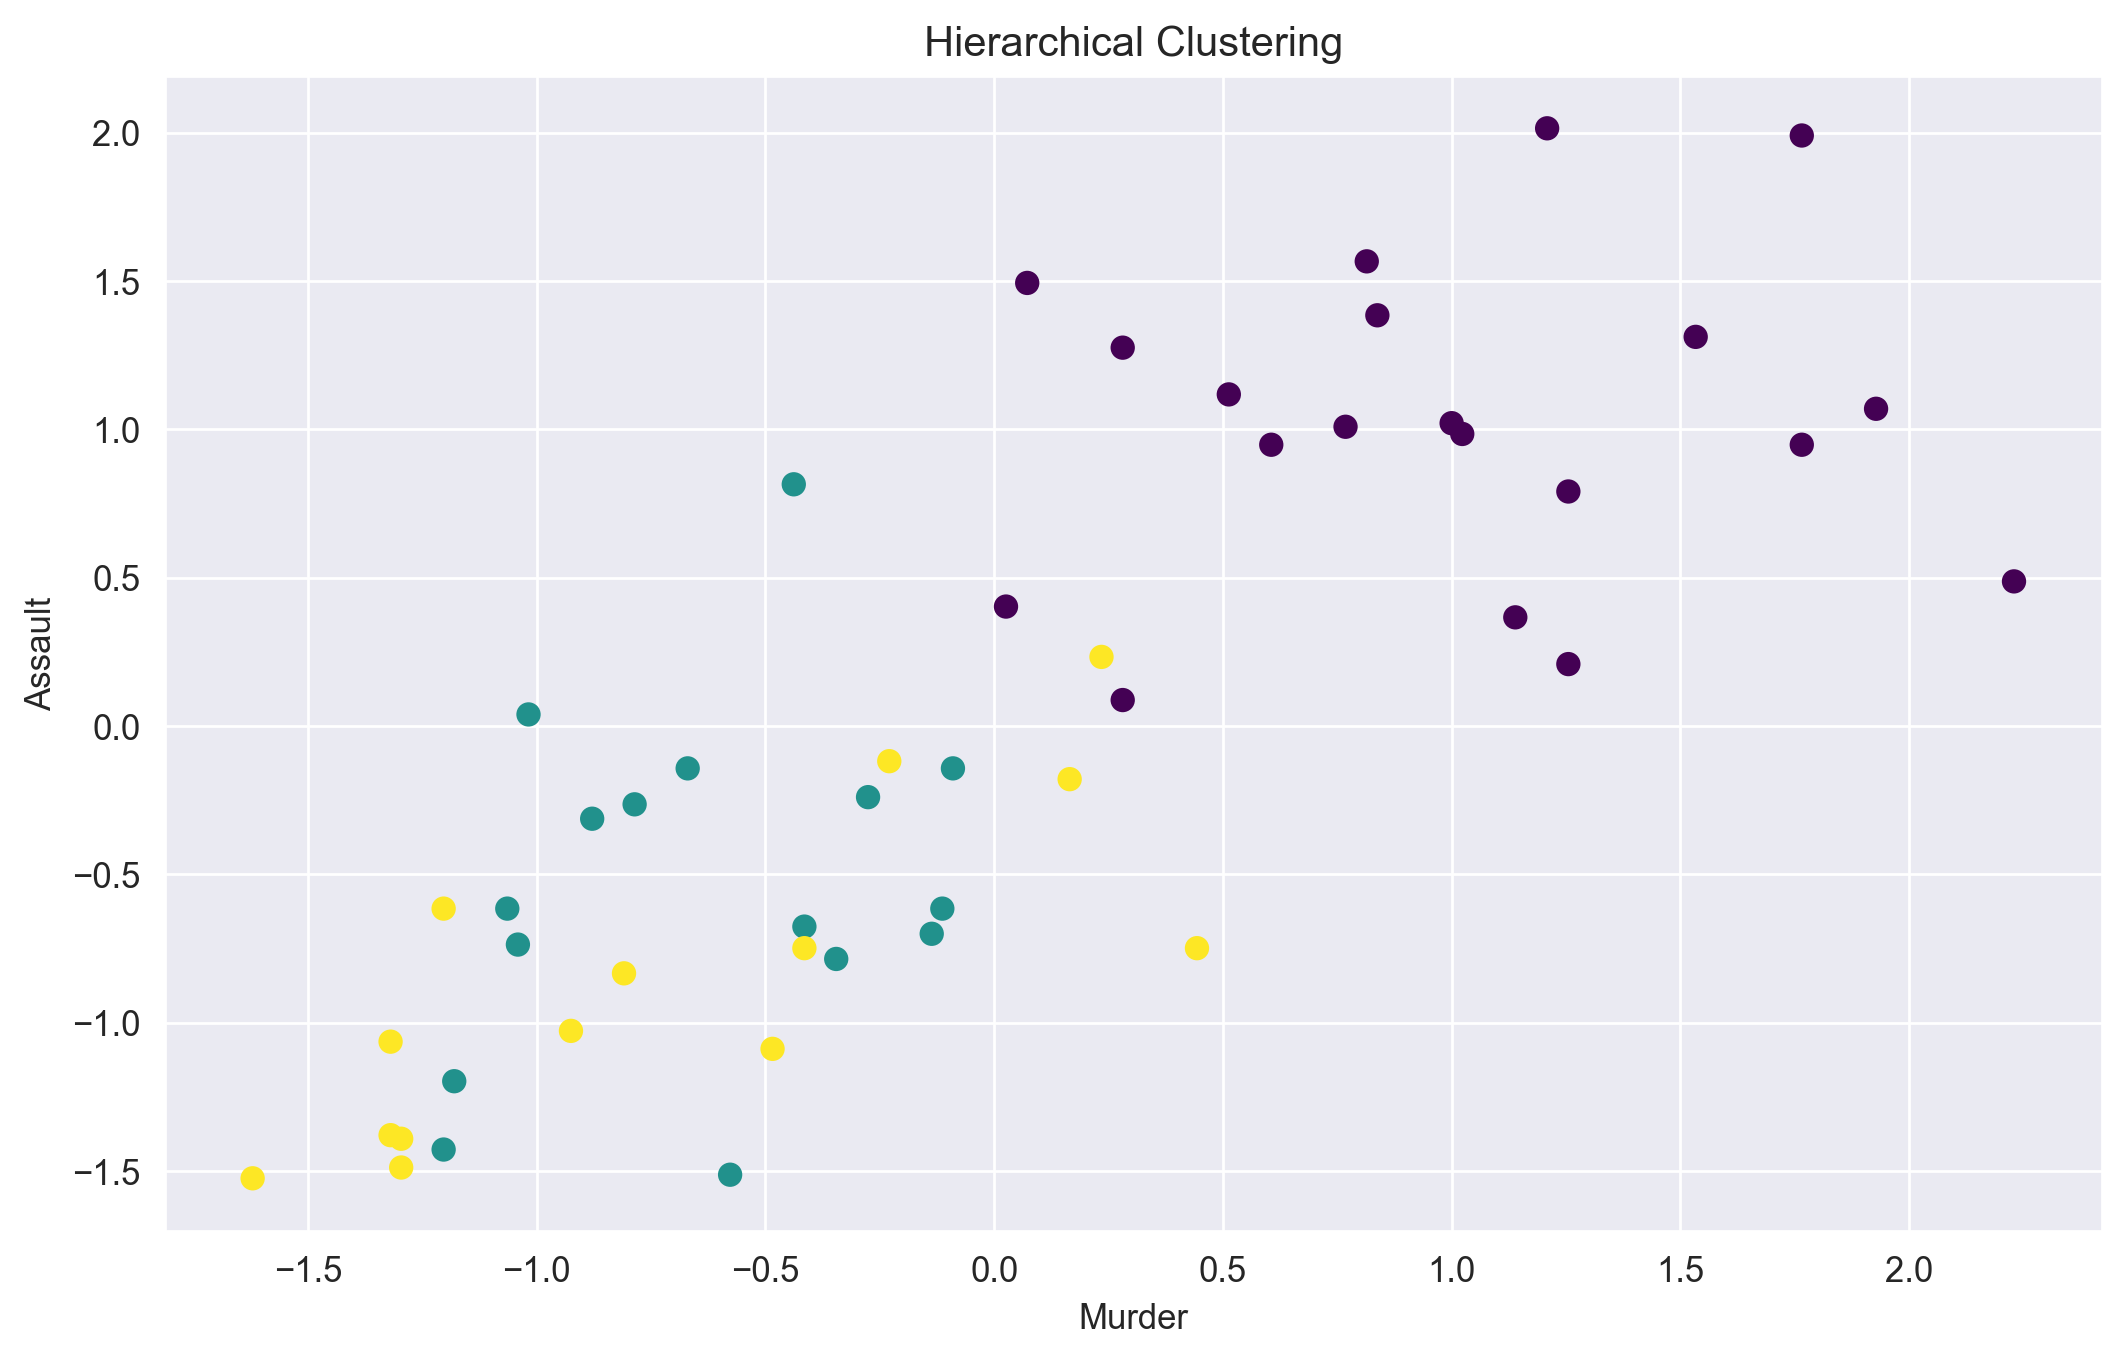

In [230]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

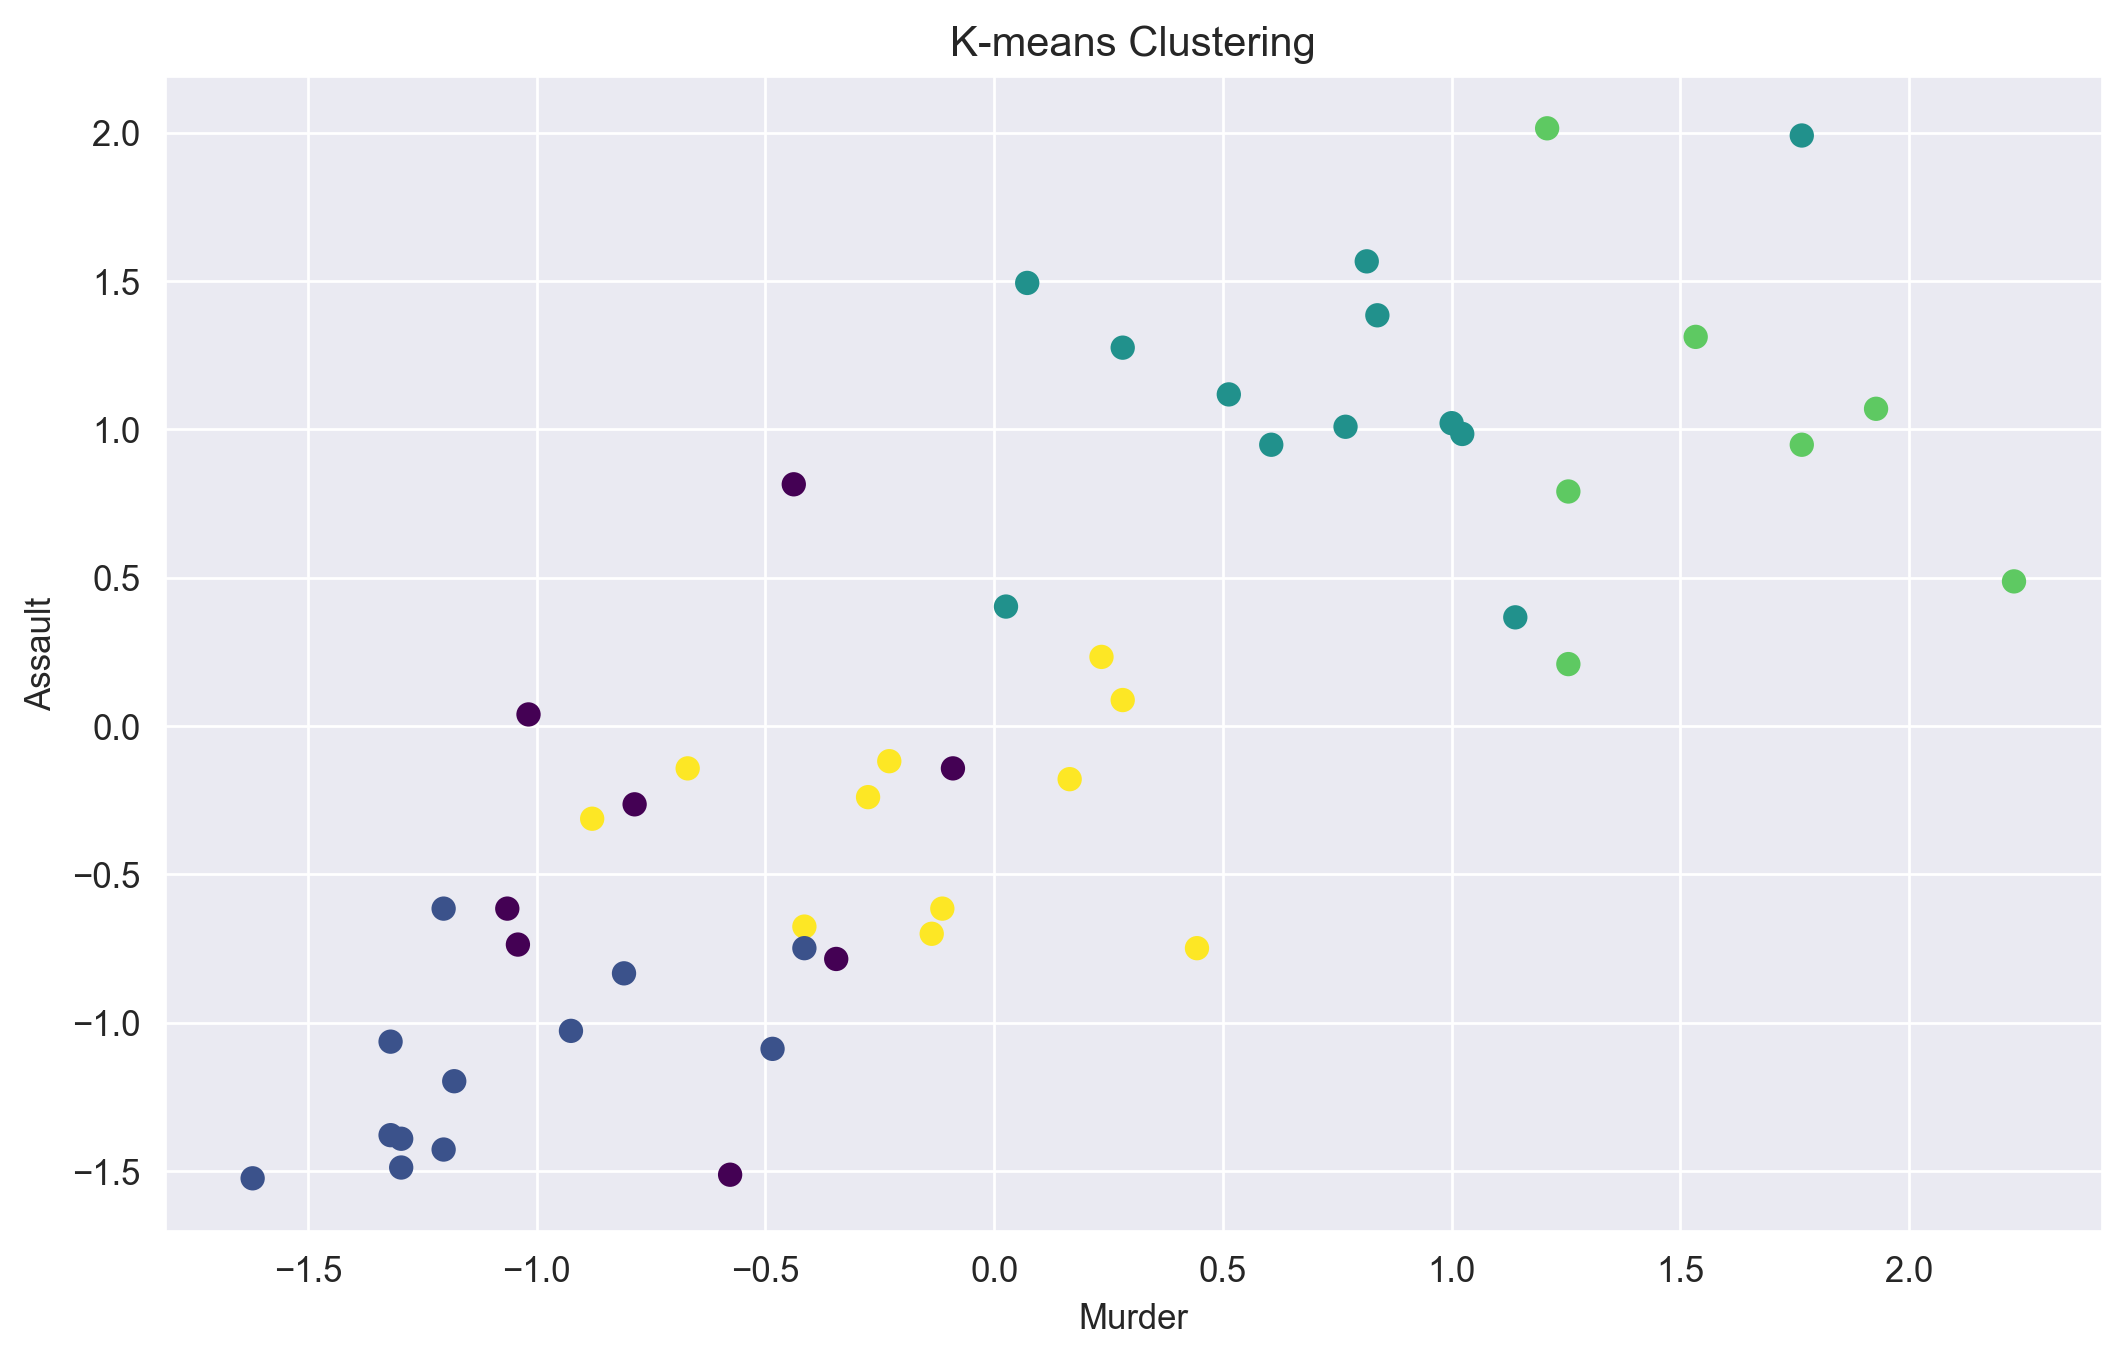

In [231]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=kmeans_label, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

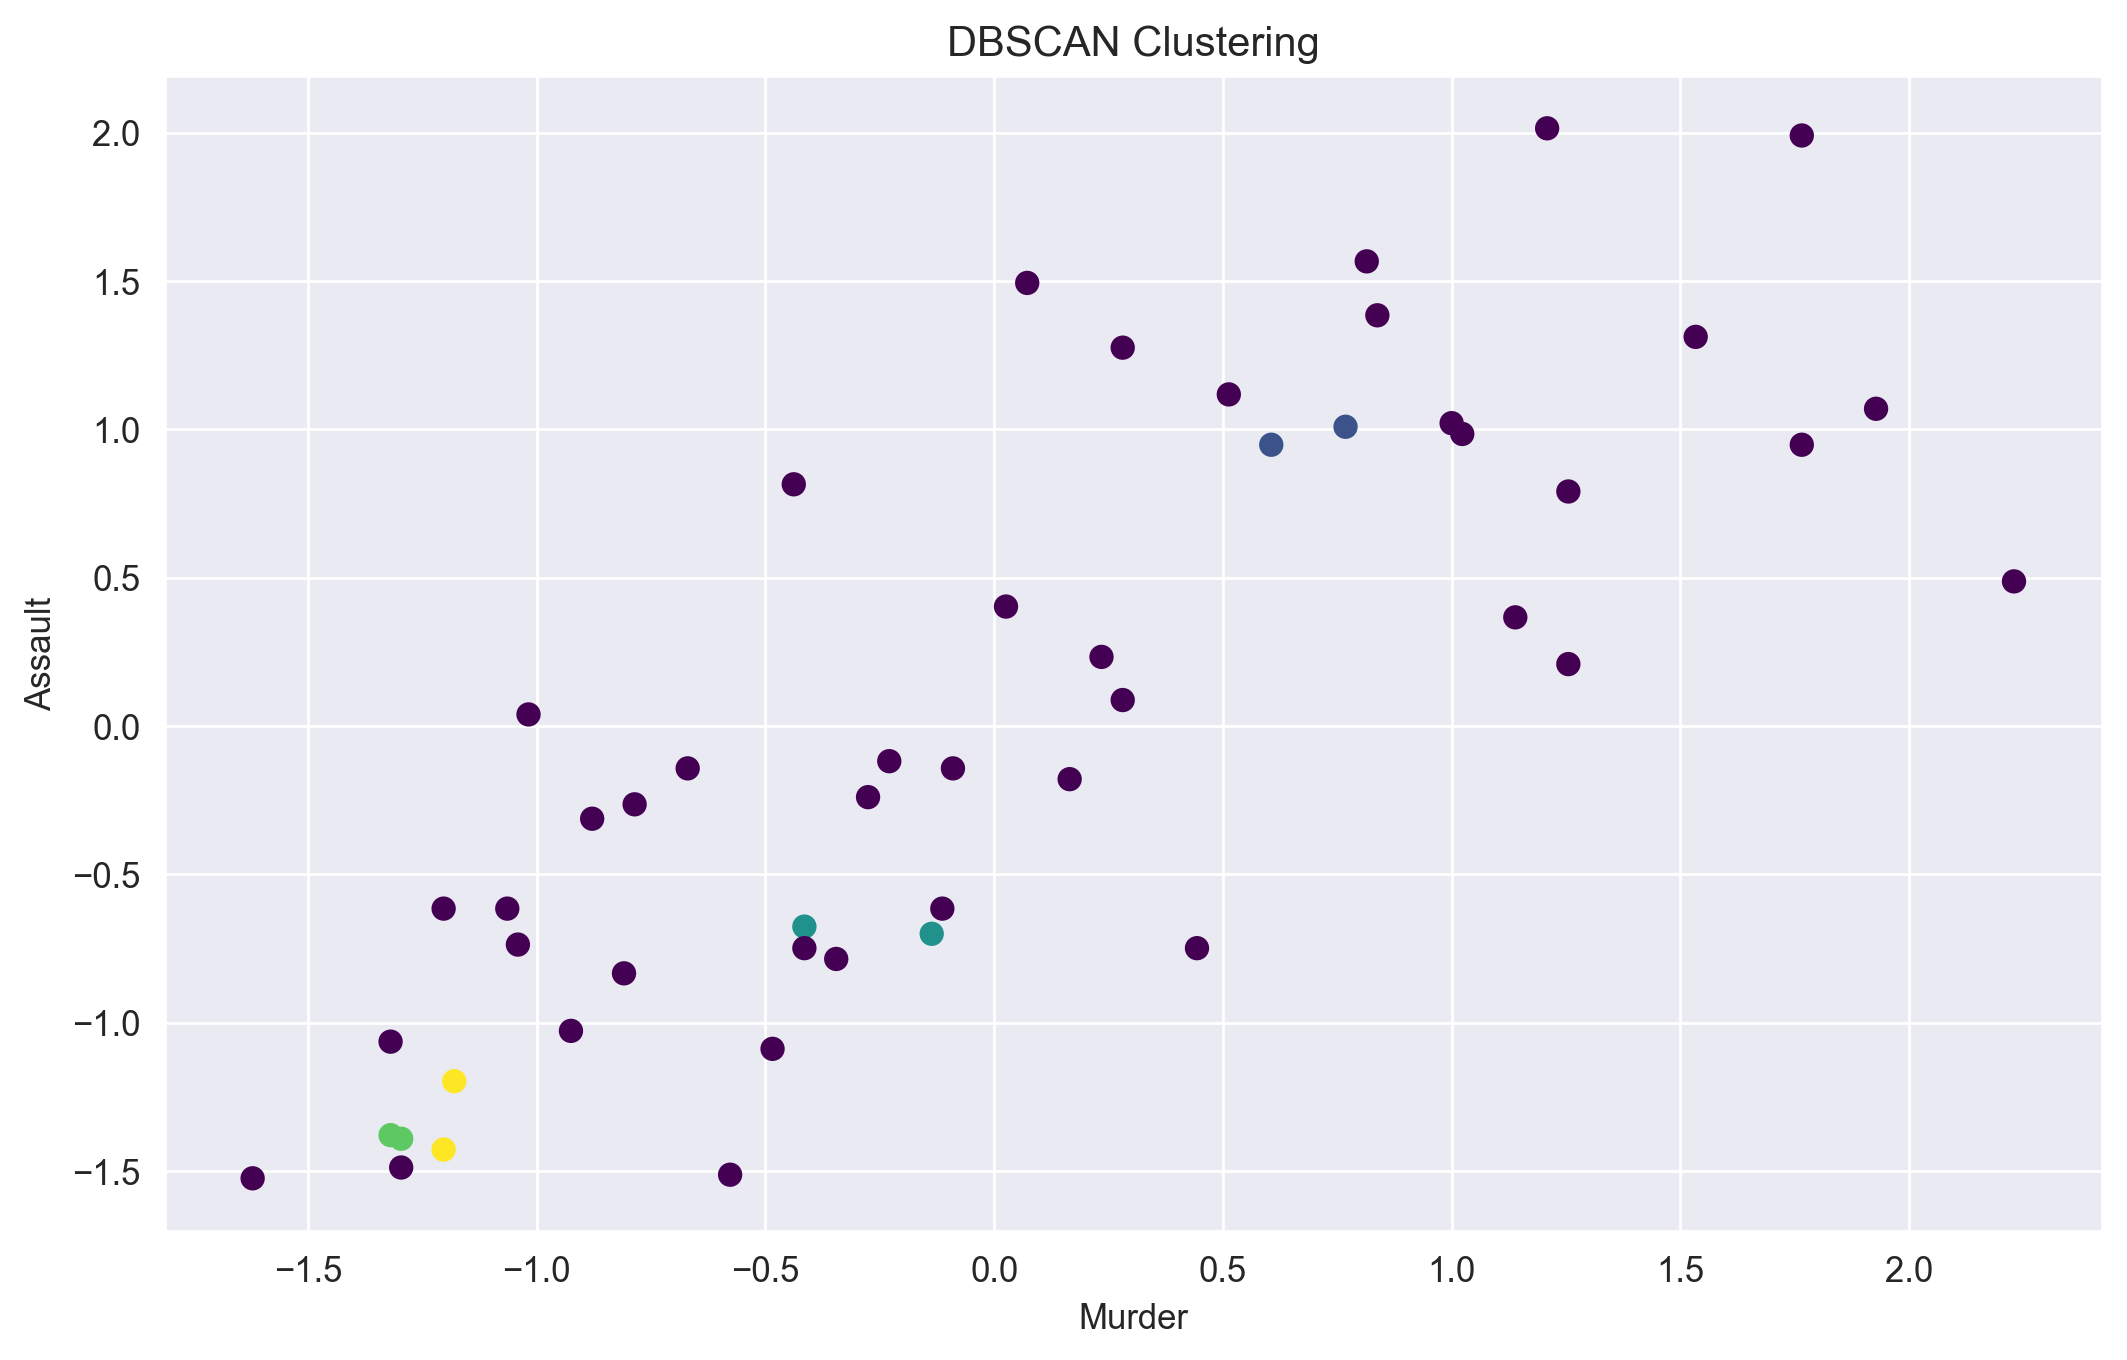

In [232]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()